In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt



C:\Users\Salih\AppData\Local\Temp\ipykernel_8844\1238531442.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
python_executable = os.path.abspath(sys.executable)
venv_parent_dir = os.path.dirname(os.path.dirname(python_executable))


data_path = "../Data2/products.csv"
df = pd.read_csv(data_path)

In [4]:
products_df = df.dropna()

products_df_sample = products_df.head(500)

products_df_sample["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

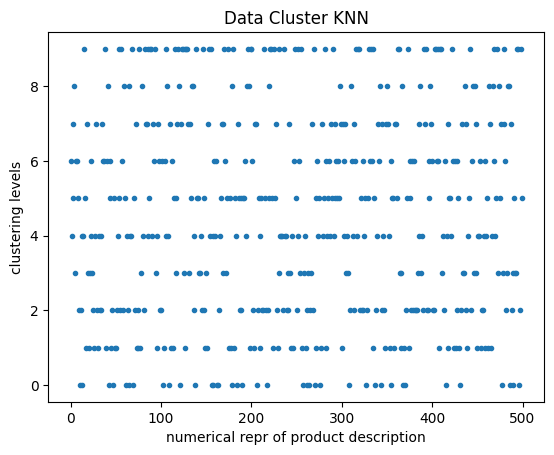

In [5]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(products_df_sample["product_description"])

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

plt.plot(y_kmeans, ".")
plt.xlabel("numerical repr of product description")
plt.ylabel("clustering levels")
plt.title("Data Cluster KNN")
plt.show()

In [6]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print_cluster(i)    

Top terms per cluster:
Cluster 0:
 water
 shower
 filter
 head
 watering
 helps
 ants
 sprinkler
 grill
 easy
Cluster 1:
 cycle
 wash
 steam
 away
 easy
 dryer
 cleaning
 power
 technology
 motor
Cluster 2:
 ft
 post
 painted
 moulding
 fence
 rail
 primed
 piece
 rug
 vary
Cluster 3:
 sheet
 metal
 design
 cut
 cabinet
 36
 pull
 aluminum
 style
 form
Cluster 4:
 water
 air
 easy
 heater
 tank
 use
 gas
 temperature
 control
 cooling
Cluster 5:
 insulation
 metal
 seal
 use
 ft
 roof
 attic
 water
 roofing
 provides
Cluster 6:
 light
 watt
 power
 volt
 led
 20
 depot
 plan
 bulbs
 bulb
Cluster 7:
 wall
 storage
 shelves
 panels
 easy
 lbs
 adjustable
 finish
 space
 home
Cluster 8:
 cooking
 oven
 door
 easy
 opening
 window
 porcelain
 cu
 burner
 nickel
Cluster 9:
 wood
 paint
 concrete
 frame
 patio
 color
 stake
 outdoor
 steel
 resistant


In [7]:
def show_recommendations(product): #recommendation based on product description
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [8]:
show_recommendations("cutting tool")

Cluster 5:
 insulation
 metal
 seal
 use
 ft
 roof
 attic
 water
 roofing
 provides


In [9]:
show_recommendations("spray paint")

Cluster 9:
 wood
 paint
 concrete
 frame
 patio
 color
 stake
 outdoor
 steel
 resistant
